In [3]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data_to_load)
clinical_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
mouse_clinical = pd.merge(mouse_data, clinical_data, how="outer")
# Display the data table for preview
mouse_clinical.head(40)


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
5,f234,Stelasyn,25,52.178602,2
6,f234,Stelasyn,30,56.873817,2
7,f234,Stelasyn,35,57.748758,2
8,x402,Stelasyn,0,45.000000,0
9,x402,Stelasyn,5,46.327570,1


## Tumor Response to Treatment

In [4]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
drug_timepoint_volume = mouse_clinical.groupby(['Drug','Timepoint'])
drug_timepoint_volume_ave = drug_timepoint_volume['Tumor Volume (mm3)'].mean()

drug_timepoint_volume_ave_df = pd.DataFrame(drug_timepoint_volume_ave)
drug_timepoint_volume_ave_df.head()
# Preview DataFrame


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [5]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
drug_timepoint_volume = mouse_clinical.groupby(['Drug','Timepoint'])
drug_timepoint_volume_sem = drug_timepoint_volume['Tumor Volume (mm3)'].sem()
drug_timepoint_volume_sem_df = pd.DataFrame(drug_timepoint_volume_sem)
drug_timepoint_volume_sem_df.head()

# Convert to DataFrame

# Preview DataFrame



Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [6]:
# Minor Data Munging to Re-Format the Data Frames
series = pd.pivot_table(drug_timepoint_volume_ave_df, values="Tumor Volume (mm3)", index="Timepoint", columns="Drug")
# Preview that Reformatting worked
series


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


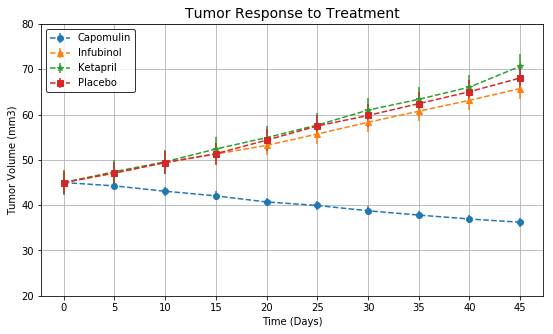

In [7]:
# Generate the Plot (with Error Bars)

# Create an index for the x-axis data
x_axis = series.index
plt.figure(figsize=(9,5))

plt.errorbar(x_axis, series["Capomulin"],yerr=series["Capomulin"].sem(),
            marker ="o", linestyle= "--", label="Capomulin")
plt.errorbar(x_axis, series["Infubinol"],yerr=series["Infubinol"].sem(),
            marker ="^", linestyle= "--", label="Infubinol")
plt.errorbar(x_axis, series["Ketapril"],yerr=series["Ketapril"].sem(),
            marker ="*", linestyle= "--", label="Ketapril")
plt.errorbar(x_axis, series["Placebo"],yerr=series["Placebo"].sem(),
            marker ="s", linestyle= "--", label="Placebo")

#Aesthetics 
plt.title("Tumor Response to Treatment", fontsize=14)
plt.xlabel("Time (Days)", fontsize=10)
plt.ylabel("Tumor Volume (mm3)", fontsize=10)
plt.xticks(np.arange(0, series.index.max()+5, 5))
plt.yticks(np.arange(20, 90, 10))

# Create a legend
legend = plt.legend(numpoints= 1,
                   markerscale= 1,
                   fontsize= 10,
                   frameon=True,
                   edgecolor="black")
# Add a grid and show the chart
plt.grid()

# Save the Figure
plt.savefig("data/Scatter_plt_Tumor_Response_2_drugs_with_labels.png")


In [8]:
# Show the Figure
plot1 = series.plot


## Metastatic Response to Treatment

In [9]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
drug_timepoint_met = mouse_clinical.groupby(['Drug','Timepoint'])
drug_timepoint_met_ave = drug_timepoint_met['Metastatic Sites'].mean()

drug_timepoint_met_ave_df = pd.DataFrame(drug_timepoint_met_ave)
drug_timepoint_met_ave_df.head()
# Convert to DataFrame

# Preview DataFrame


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [10]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
drug_timepoint_met = mouse_clinical.groupby(['Drug','Timepoint'])
drug_timepoint_met_sem = drug_timepoint_met['Metastatic Sites'].sem()

drug_timepoint_met_sem_df = pd.DataFrame(drug_timepoint_met_sem)
drug_timepoint_met_sem_df.head()
# Convert to DataFrame

# Preview DataFrame


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [11]:
# Minor Data Munging to Re-Format the Data Frames
series2 = pd.pivot_table(drug_timepoint_met_ave_df, values="Metastatic Sites", index="Timepoint", columns="Drug")

# Preview that Reformatting worked
series2

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


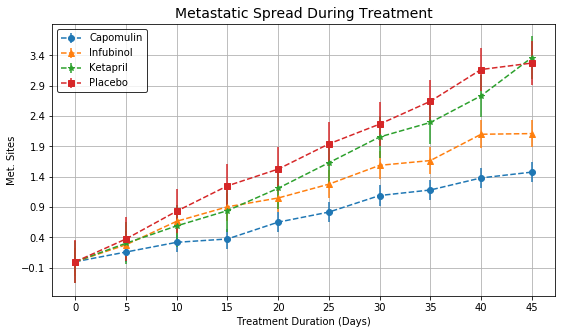

In [21]:
# Generate the Plot (with Error Bars)
x_axis = series2.index
plt.figure(figsize=(9,5))

plt.errorbar(x_axis, series2["Capomulin"],yerr=series2["Capomulin"].sem(),
            marker ="o", linestyle= "--", label="Capomulin")
plt.errorbar(x_axis, series2["Infubinol"],yerr=series2["Infubinol"].sem(),
            marker ="^", linestyle= "--", label="Infubinol")
plt.errorbar(x_axis, series2["Ketapril"],yerr=series2["Ketapril"].sem(),
            marker ="*", linestyle= "--", label="Ketapril")
plt.errorbar(x_axis, series2["Placebo"],yerr=series2["Placebo"].sem(),
            marker ="s", linestyle= "--", label="Placebo")

#Aesthetics 
plt.title("Metastatic Spread During Treatment", fontsize=14)
plt.xlabel("Treatment Duration (Days)", fontsize=10)
plt.ylabel("Met. Sites", fontsize=10)
plt.xticks(np.arange(0, series2.index.max()+5, 5))
plt.yticks(np.arange(-0.1, 3.5, 0.5))

# Create a legend
legend = plt.legend(numpoints= 1,
                   markerscale= 1,
                   fontsize= 10,
                   frameon=True,
                   edgecolor="black")
# Add a grid and show the chart
plt.grid()

# Save the Figure
plt.savefig("data/Metastatic Spread.png")
# Save the Figure

# Show the Figure


## Survival Rates

In [13]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
#drug_mice = mouse_clinical.groupby(['Drug','Timepoint'])
#drug_mice_count = drug_mice['Mouse ID'].nunique()
#
#drug_mice_count_df = pd.DataFrame(drug_mice_count)
#drug_mice_count_df.head()
# Convert to DataFrame

vcounts = pd.DataFrame(mouse_clinical.groupby(["Drug","Timepoint"])["Mouse ID"].nunique())
vcounts.head()
# Preview DataFrame


Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [14]:
# Minor Data Munging to Re-Format the Data Frames
series3 = pd.pivot_table(vcounts, values="Mouse ID", index="Timepoint", columns="Drug")
series3
# Preview the Data Frame


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


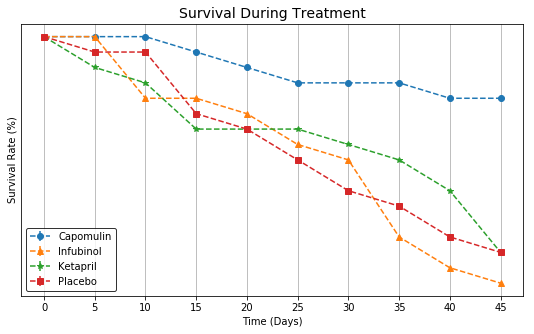

In [22]:
# Generate the Plot (Accounting for percentages)
x_axis = series3.index
plt.figure(figsize=(9,5))

plt.errorbar(x_axis, series3["Capomulin"]*100,yerr=series3["Capomulin"].sem(),
            marker ="o", linestyle= "--", label="Capomulin")
plt.errorbar(x_axis, series3["Infubinol"]*100,yerr=series3["Infubinol"].sem(),
            marker ="^", linestyle= "--", label="Infubinol")
plt.errorbar(x_axis, series3["Ketapril"]*100,yerr=series3["Ketapril"].sem(),
            marker ="*", linestyle= "--", label="Ketapril")
plt.errorbar(x_axis, series3["Placebo"]*100,yerr=series3["Placebo"].sem(),
            marker ="s", linestyle= "--", label="Placebo")

#Aesthetics 
plt.title("Survival During Treatment", fontsize=14)
plt.xlabel("Time (Days)", fontsize=10)
plt.ylabel("Survival Rate (%)", fontsize=10)
plt.xticks(np.arange(0, series3.index.max()+5, 5))
plt.yticks(np.arange(3500, 100, 10))

# Create a legend
legend = plt.legend(numpoints= 1,
                   markerscale= 1,
                   fontsize= 10,
                   frameon=True,
                   edgecolor="black")
# Add a grid and show the chart
plt.grid()
# Save the Figure
plt.savefig("data/Survival During Treatment.png")
# Show the Figure
plt.show()

## Summary Bar Graph

In [16]:
# Calculate the percent changes for each drug
pct_change = (((series.iloc[-1]-series.iloc[0])/series.iloc[0])*100).to_frame("% change")
pct_change
#pct_change = pct['Tumor Volume (mm3)'].pct_change()
#pct_change_df = pd.DataFrame(pct_change)
#pct_change_df.head()
# Display the data to confirm


,% change
Drug,
Capomulin,-19.475303
Ceftamin,42.516492
Infubinol,46.123472
Ketapril,57.028795
Naftisol,53.923347
Placebo,51.297960
Propriva,47.241175
Ramicane,-22.320900
Stelasyn,52.085134


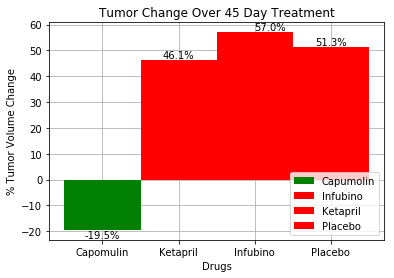

In [26]:
all_data = {'treatment': ['Capomulin', 'Ketapril', 'Infubino', 'Placebo'],
            'Total % Change': [-19.475303 , 46.123472, 57.028795, 51.297960]}
bar_data_df = pd.DataFrame(all_data)
bar_data_df.head()
ticks = np.arange(4)

barwidth = 1

plt.grid()
plt.rc('axes', axisbelow=True)

plt.bar(ticks[0], -19.475303, width = barwidth, color = 'green', label='Capumolin')
c = np.float(-19.475303)
c = "{:0.3}%".format(c)
plt.text(ticks[0], -19.475303, str(c), horizontalalignment='center', verticalalignment = 'top')

plt.bar(ticks[1], 46.123472, width = barwidth, color = 'red', label='Infubino')
i = np.float(46.123472)
i = "{:0.3}%".format(i)
plt.text(ticks[1], 46.123472, str(i), horizontalalignment='center', verticalalignment = 'bottom')

plt.bar(ticks[2], 57.028795, width = barwidth, color = 'red', label='Ketapril')
k = np.float(57.028795)
k = "{:0.3}%".format(k)
plt.text(ticks[2], 57.028795, str(k), verticalalignment = 'bottom')

plt.bar(ticks[3], 51.297960, width = barwidth, color = 'red', label='Placebo')
p = np.float(51.297960)
p = "{:0.3}%".format(p)
plt.text(ticks[3], 51.297960, str(p), horizontalalignment='center', verticalalignment = 'bottom')

plt.legend(loc='lower right')
plt.xticks(ticks, bar_data_df['treatment'], rotation=0)
plt.title("Tumor Change Over 45 Day Treatment")
plt.xlabel("Drugs")
plt.ylabel("% Tumor Volume Change")

#Save Fig
plt.savefig("data/Tumor change over 45 day treatment.png")
plt.show()

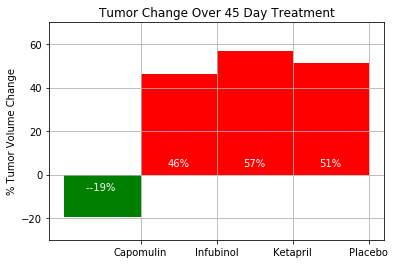